<a href="https://colab.research.google.com/github/Evans-tats/machine-learning/blob/main/academic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np #linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [4]:
df = pd.read_csv('/content/sample_data/student_admission_record_dirty.csv')

In [5]:
df.head().T

,0,1,2,3,4
Name,Shehroz,Waqar,Bushra,Aliya,Bilal
Age,24.0,21.0,17.0,17.0,20.0
Gender,Female,Female,Male,Male,Male
Admission Test Score,50.0,99.0,89.0,55.0,65.0
High School Percentage,68.9,60.73,NaN,85.29,61.13
City,Quetta,Karachi,Islamabad,Karachi,Lahore
Admission Status,Rejected,NaN,Accepted,Rejected,NaN


In [6]:
df.shape

(157, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,147.0,19.680272,4.540512,-1.0,18.0000,20.000,22.0000,24.0
Admission Test Score,146.0,77.657534,16.855343,-5.0,68.2500,79.000,89.0000,150.0
High School Percentage,146.0,75.684726,17.368014,-10.0,65.0525,77.545,88.3125,110.5


In [9]:
df.isna().sum()

,0
Name,10
Age,10
Gender,10
Admission Test Score,11
High School Percentage,11
City,10
Admission Status,10


In [10]:
#show rows with at least one NaN values
df[df.isna().any(axis=1)]

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN
5,Murtaza,23.0,Female,NaN,NaN,Islamabad,Accepted
6,Asad,18.0,Male,NaN,97.31,Multan,Accepted
8,Rohail,17.0,Male,64.0,NaN,Karachi,Accepted
11,Nashit,18.0,Male,89.0,NaN,Lahore,Accepted
12,NaN,19.0,Male,66.0,88.17,NaN,NaN
16,Mahnoor,NaN,Male,61.0,74.08,Islamabad,Rejected
19,NaN,19.0,Male,84.0,NaN,Islamabad,Rejected


In [11]:
df = df.rename({
    "Name": "name",
    "Age": "age",
    'Gender': 'gender',
    'Admission Test Score': "test_score",
    "High School Percentage": 'hs_perc',
    "City": "city",
    "Admission Status": "adm_status",
}, axis=1)

In [12]:
df.head()

,name,age,gender,test_score,hs_perc,city,adm_status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN


Text(0.5, 1.0, 'Some h.s percentage are too distant from the typical range')

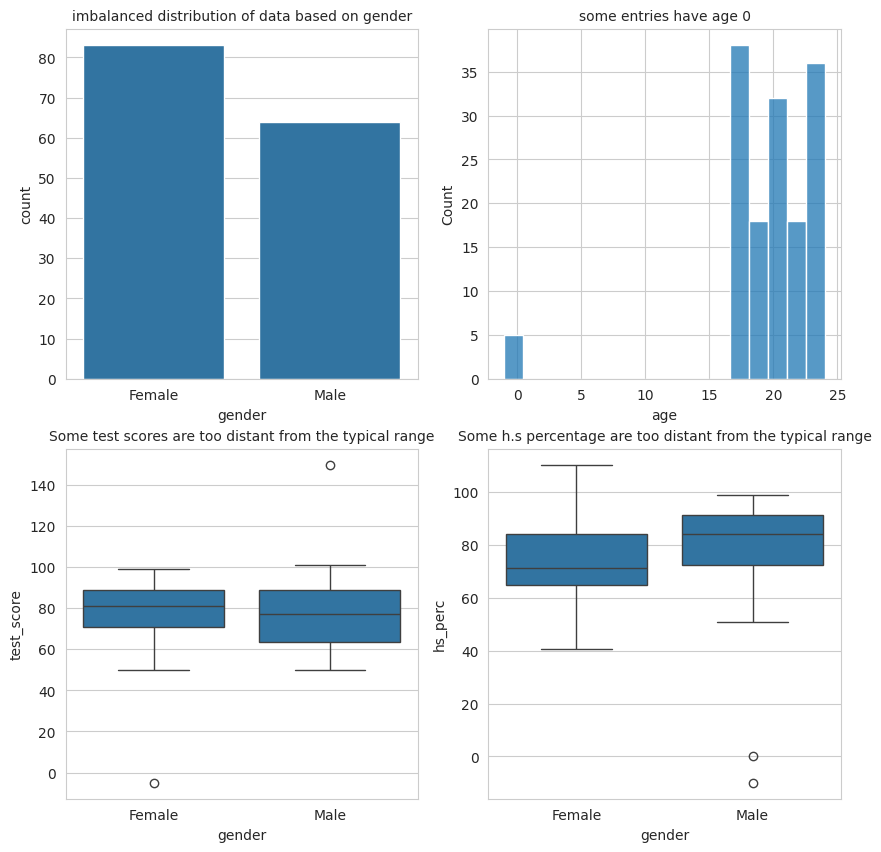

In [13]:
fig, [[ax1,ax2], [ax3,ax4]] = plt.subplots(2,2, figsize=(10,10))

sns.countplot(df, x='gender', ax=ax1)
ax1.set_title("imbalanced distribution of data based on gender", fontsize=10)

sns.histplot(df, x='age', ax=ax2)
ax2.set_title('some entries have age 0', fontsize=10)

sns.boxplot(df, x='gender', y='test_score', ax=ax3)
ax3.set_title("Some test scores are too distant from the typical range", fontsize=10)

sns.boxplot(df, x = 'gender', y='hs_perc', ax=ax4)
ax4.set_title("Some h.s percentage are too distant from the typical range", fontsize=10)



Text(0.5, 0.98, 'anamolies visible in scatter plot')

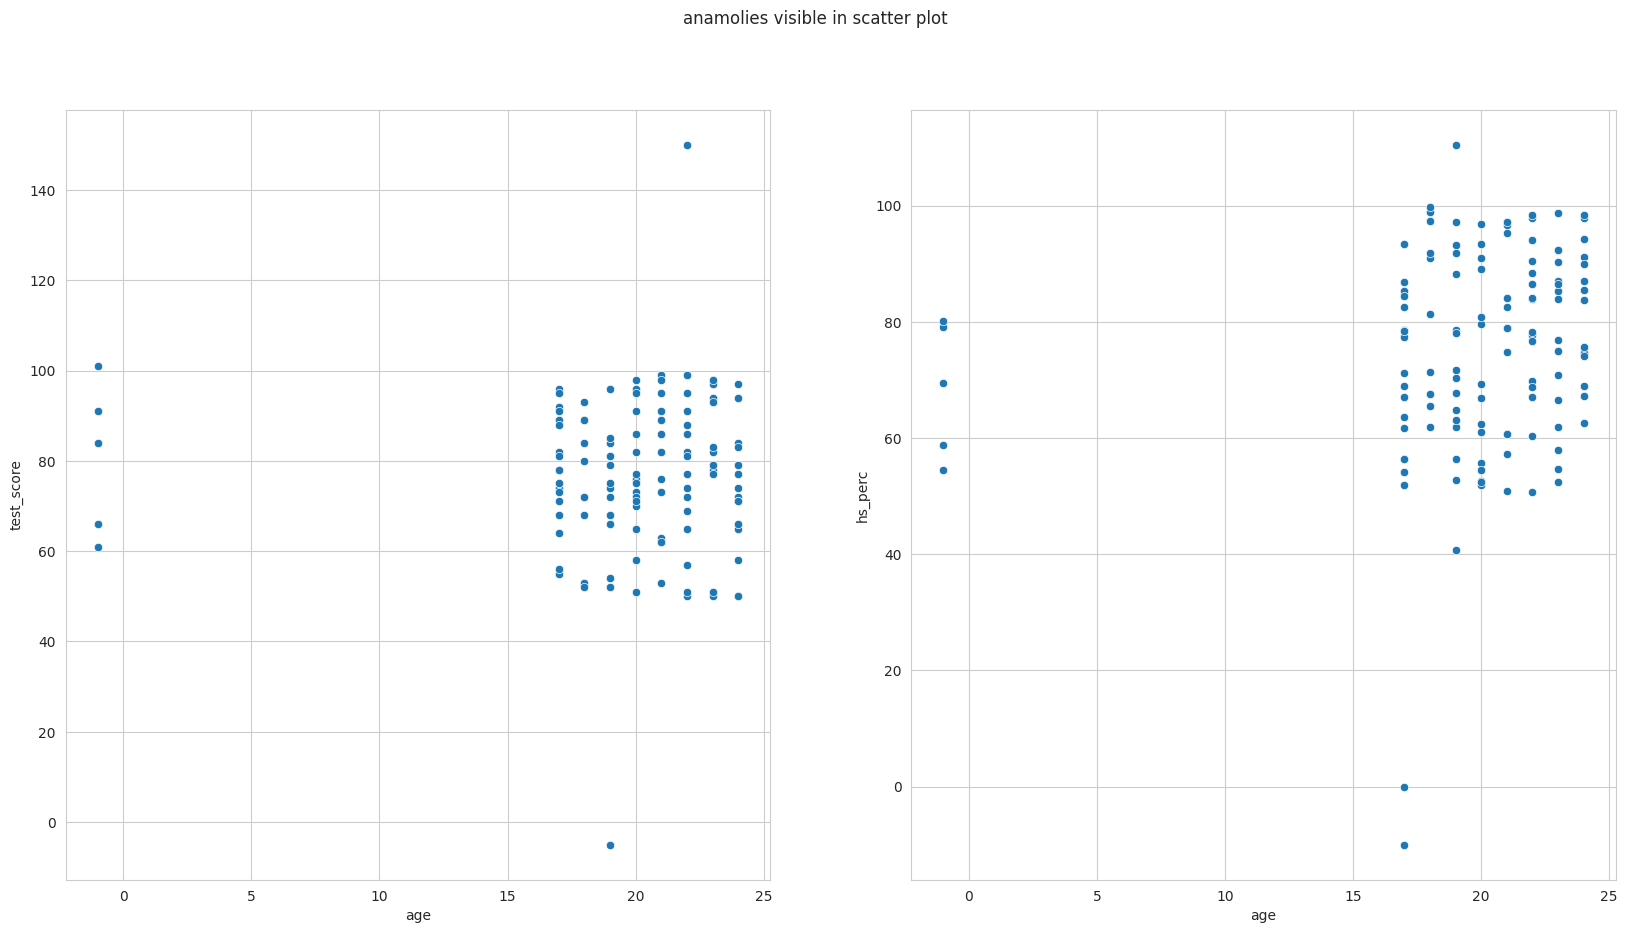

In [14]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,10))

sns.scatterplot(df, x="age", y="test_score", ax=ax1)
sns.scatterplot(df, x='age', y='hs_perc', ax=ax2)

fig.suptitle("anamolies visible in scatter plot")

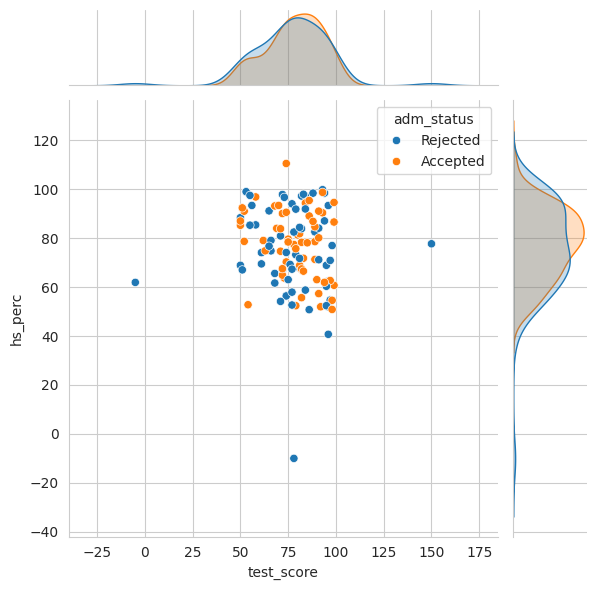

In [15]:
sns.jointplot(df, x="test_score", y="hs_perc", hue="adm_status")

In [16]:
df["city"].value_counts()

,count
city,
Quetta,30
Karachi,28
Multan,21
Peshawar,18
Islamabad,17
Lahore,17
Rawalpindi,16


<Axes: xlabel='city', ylabel='count'>

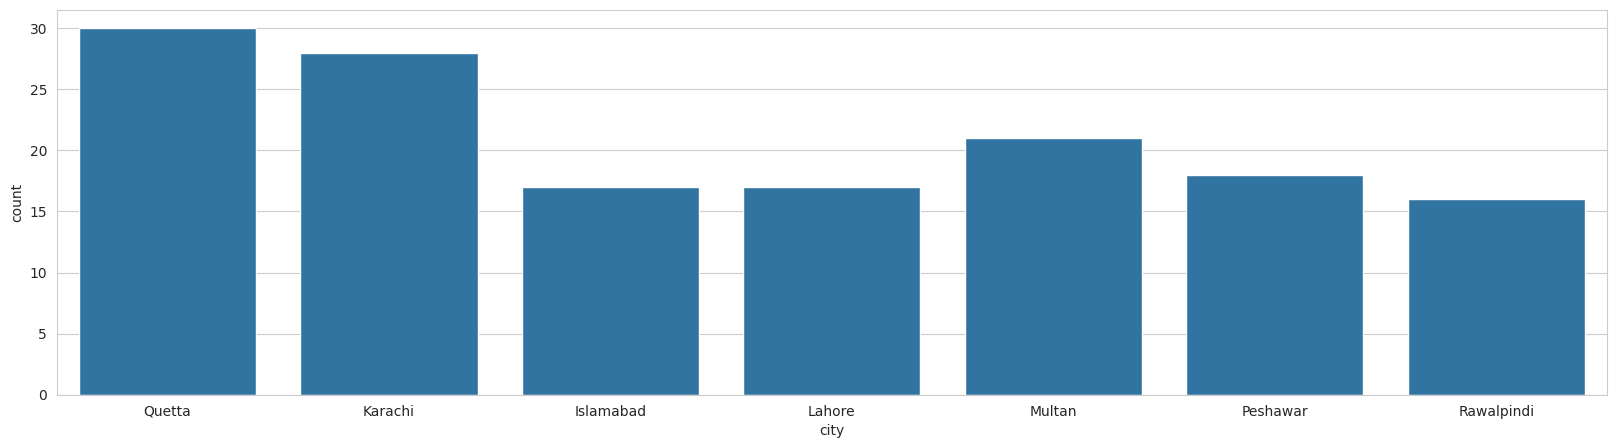

In [17]:
plt.subplots(1,1, figsize=(20,5))
sns.countplot(df, x='city')


Text(0.5, 1.0, 'h.s percentage')

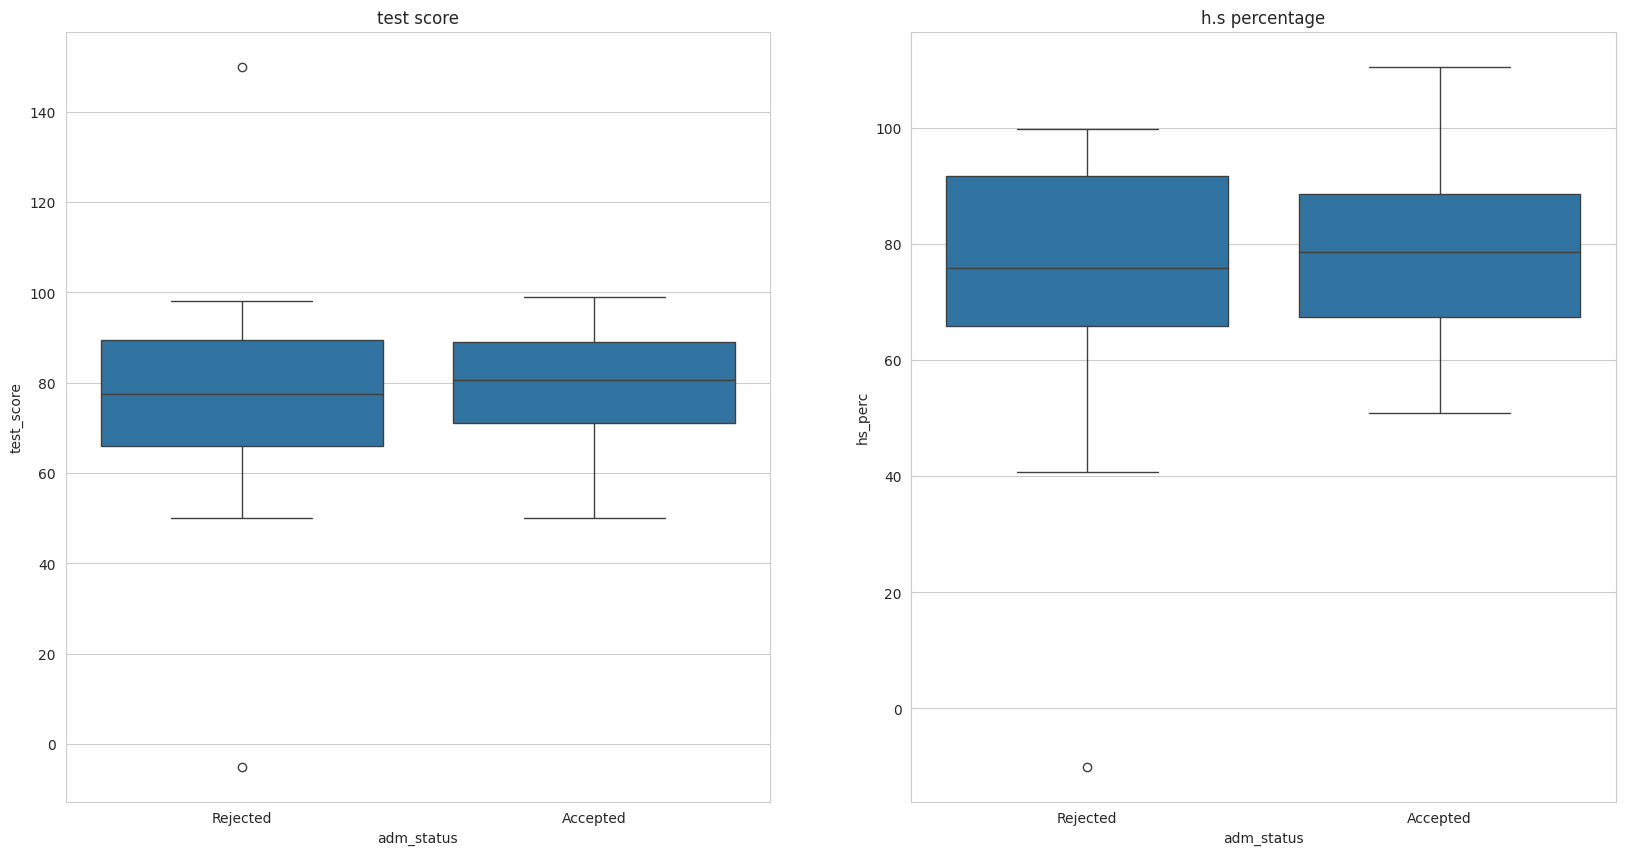

In [18]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,10))

sns.boxplot(df, x="adm_status", y="test_score", ax=ax1)
ax1.set_title("test score")
sns.boxplot(df, x="adm_status", y="hs_perc", ax=ax2)
ax2.set_title("h.s percentage")

<Axes: xlabel='age', ylabel='Count'>

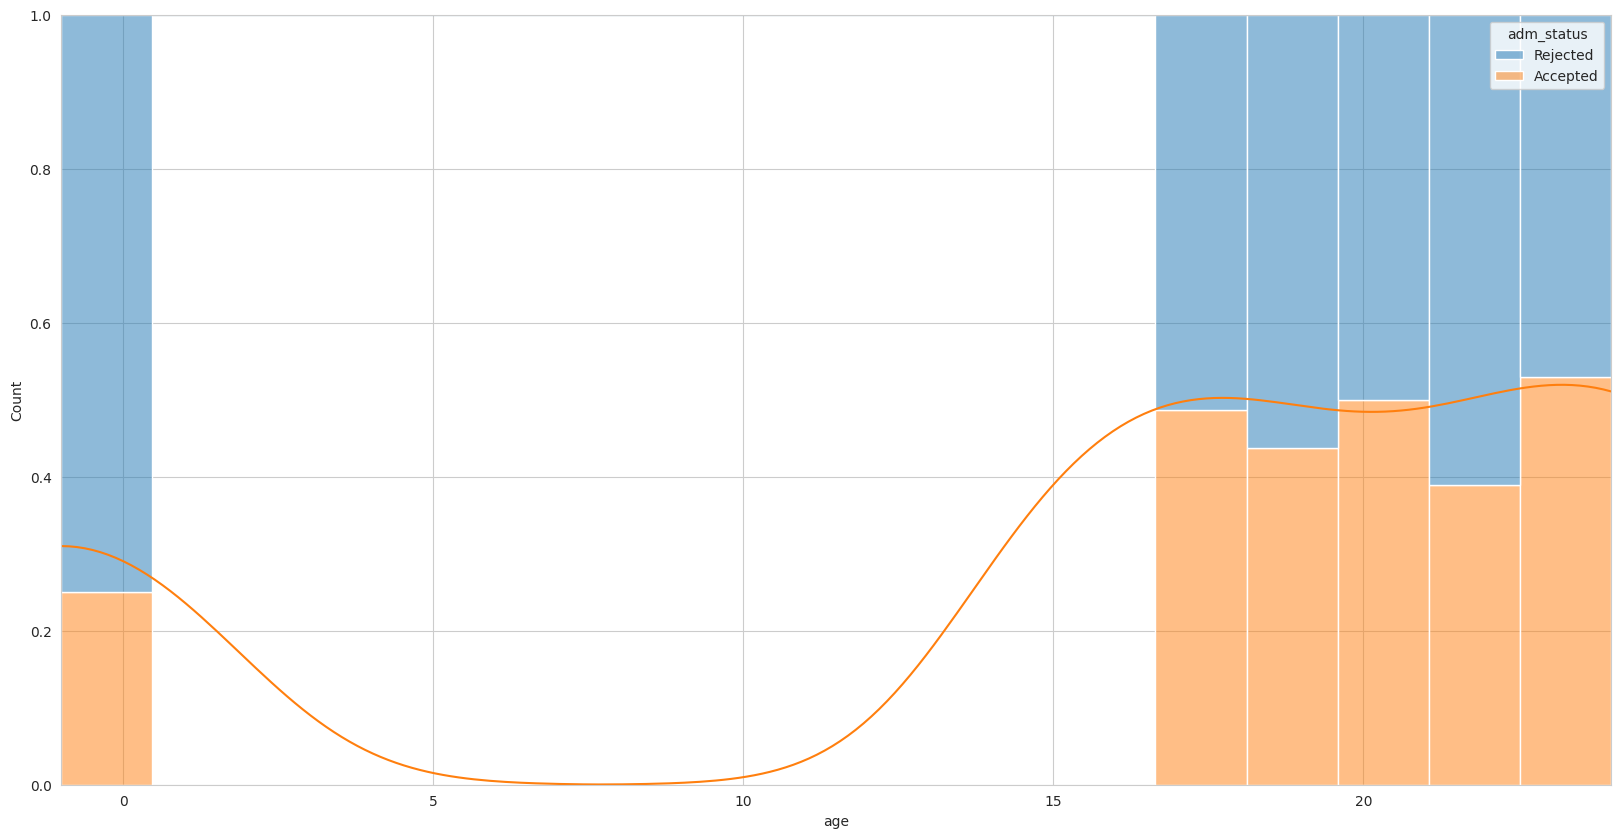

In [19]:
plt.subplots(1,1, figsize=(20,10))

sns.histplot(df, x="age", hue="adm_status", multiple='fill', kde=True )

<Axes: xlabel='city', ylabel='Count'>

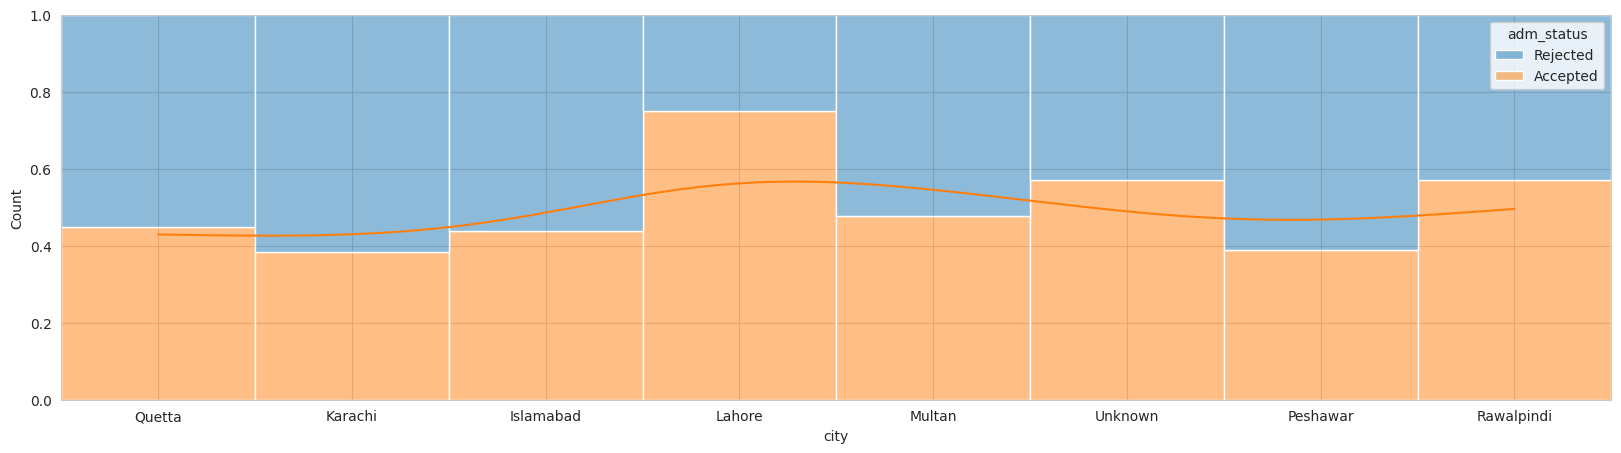

In [20]:
plt.subplots(1,1, figsize=(20,5))

sns.histplot(df.fillna({"city":"Unknown"}), x="city", hue="adm_status", multiple='fill', kde=True)

In [21]:
df = df.fillna({"city":"Unknown"})
df.head()

,name,age,gender,test_score,hs_perc,city,adm_status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN


In [22]:
"""Calculate the lower and upper fence for the plot"""
def iqr_fence(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1
  lower_fence = Q1 - (1.5 * IQR)
  upper_fence = Q3 + (1.5 * IQR)
  u = max(x[x<upper_fence])
  l = min(x[x>lower_fence])

  return (l,u)

In [23]:
l,u = iqr_fence(df["test_score"])
df["test_score"] = df["test_score"].clip(l,u)
#removeing anomalies by clamping values between the whiskers in the boxplot

In [24]:
l,u = iqr_fence(df["hs_perc"])
df["hs_perc"] = df["hs_perc"].clip(l, u)


In [25]:
df = df.fillna({
    "test_score": df["test_score"].mean(),
    "hs_perc": df["hs_perc"].mean(),
})

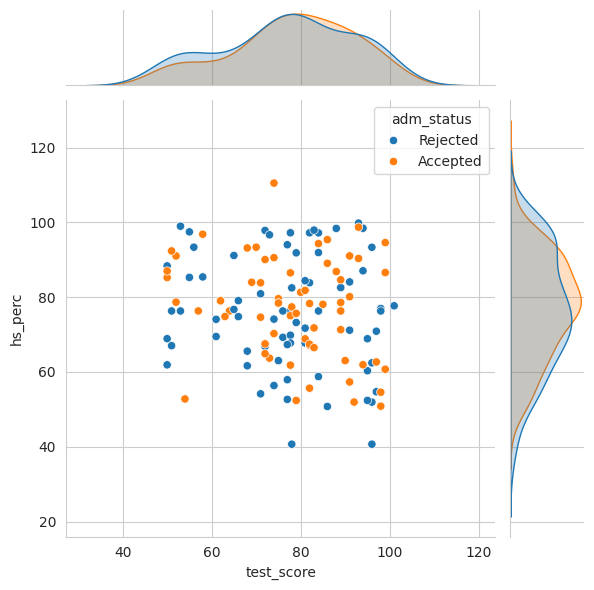

In [26]:
sns.jointplot(df, x="test_score", y="hs_perc", hue="adm_status")

In [27]:
l,u = iqr_fence(df["age"])
df["age"] = df["age"].clip(l,u)


In [28]:
df["age"] = df["age"].fillna(df["age"].mean())

Text(0.5, 1.0, 'Anamolies for age have been removed')

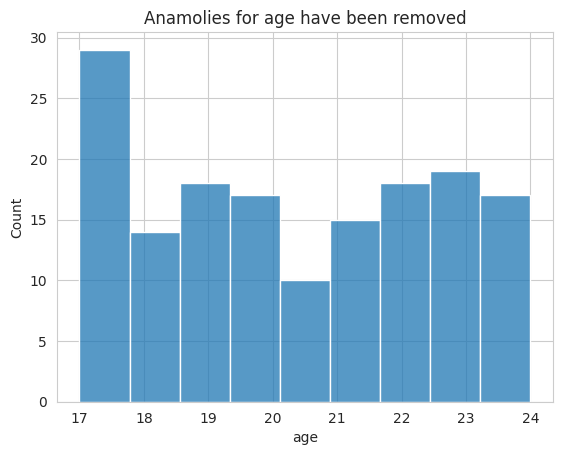

In [29]:
sns.histplot(df, x="age")
plt.title("Anamolies for age have been removed")

In [30]:
##same plots after cleaning

<Axes: xlabel='gender', ylabel='hs_perc'>

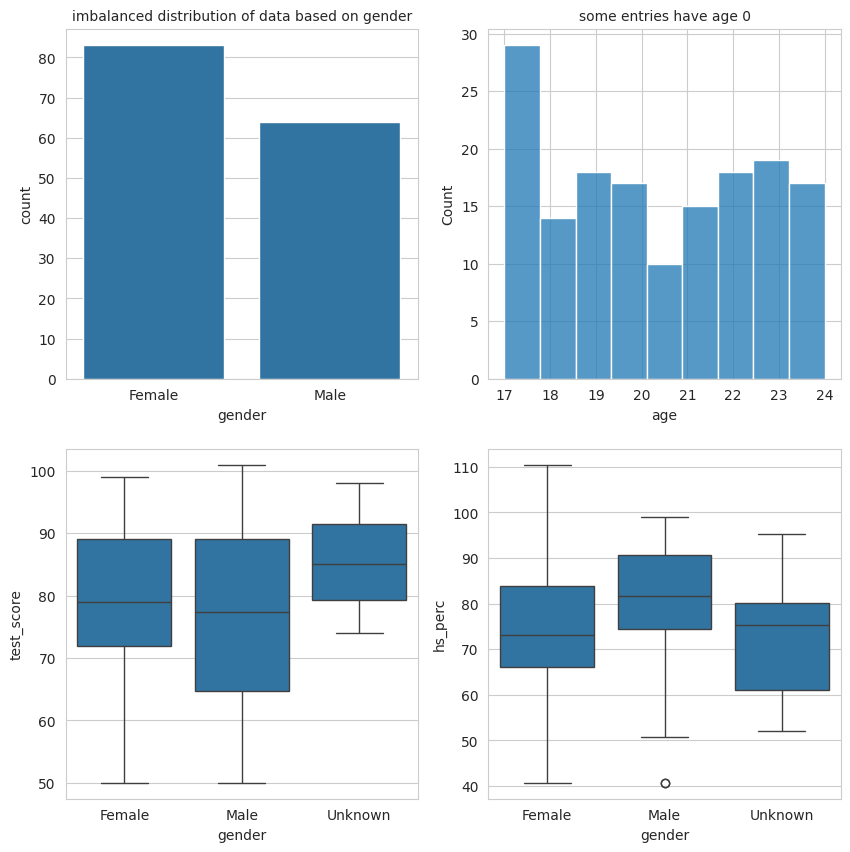

In [31]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(10,10))

sns.countplot(df, x="gender", ax=ax1)
ax1.set_title("imbalanced distribution of data based on gender", fontsize=10)

sns.histplot(df, x="age", ax=ax2)
ax2.set_title("some entries have age 0", fontsize=10)

sns.boxplot(df.fillna({"gender": "Unknown"}), x="gender", y="test_score", ax=ax3)

sns.boxplot(df.fillna({"gender":"Unknown"}), x="gender", y="hs_perc", ax=ax4)

In [32]:
df = df.drop("name", axis=1)

In [33]:
df = df.fillna({"gender":"Unknown"})

In [34]:
df = df[df["adm_status"].notna()]

In [35]:
df.isna().sum()

,0
age,0
gender,0
test_score,0
hs_perc,0
city,0
adm_status,0


In [36]:
df.sample(12).tail()

,age,gender,test_score,hs_perc,city,adm_status
109,18.0,Female,72.0,67.51,Unknown,Accepted
129,19.0,Male,79.0,91.85,Islamabad,Rejected
156,17.0,Male,88.0,86.85,Lahore,Accepted
103,19.0,Female,96.0,40.70,Rawalpindi,Rejected
90,17.0,Male,78.0,77.40,Quetta,Accepted


In [37]:
df.shape

(147, 6)

In [38]:
##Data Preparation

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

y = (df["adm_status"] == "Accepted").astype(int)
x= df.drop("adm_status", axis=1)


In [40]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), ["age", "test_scores", "hs_perc"]),
        ("cat", OneHotEncoder(drop="first"), ["gender","city"])
    ]
)